In [2]:
# libraries
import pandas as pd 
import numpy as np 
import os 
import pickle as pkl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
from matplotlib import colors as clrs
import matplotlib.lines as lines
from matplotlib.ticker import FormatStrFormatter

# libraries
import sys
sys.path.append("../../models")
from functions import import_country

plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['xtick.major.width'] = 0.3
plt.rcParams['ytick.major.width'] = 0.3
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.minor.width'] = 0.2
plt.rcParams['ytick.minor.width'] = 0.2
plt.rcParams['xtick.minor.size'] = 1.5
plt.rcParams['ytick.minor.size'] = 1.5

font_dirs = ['../fonts/Bai_Jamjuree/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Bai Jamjuree'
plt.rcParams['font.sans-serif'] = 'Bai Jamjuree'
colors = ["#6CC2BD",  "#6CC2BD", "#F16E87", "#65A1A0", "#EBC26C"]

import warnings
warnings.filterwarnings("ignore")

# values of alpha and gamma
alpha_1s = [10**(-3), 10**(-2), 10**(-1), 10**(0), 10**(1), 10**(2), 10**(3)]
alpha_2s = [10**(-3), 10**(-2), 10**(-1), 10**(0), 10**(1), 10**(2), 10**(3)]
countries = ["Egypt", "Serbia", "Canada",
             "Peru", "Ukraine", "Italy"]
rs  = [1.3]
VE  = 0.9
rVs = [1.0 / 100]
vaccination_strategy = "old_first"
models = ["vaccine_rate"]

# color map
cmap = ListedColormap([to_rgba(colors[0], alpha=0.2),
                       to_rgba(colors[0], alpha=0.4),
                       to_rgba(colors[0], alpha=0.6),
                       to_rgba(colors[0], alpha=0.7),
                       to_rgba(colors[0], alpha=0.8),
                       to_rgba(colors[0], alpha=0.9),
                       to_rgba(colors[0], alpha=1.0)])

interpolation = "gaussian"
props = dict(facecolor='grey', alpha=0.1, linewidth=0.3)

Plot:

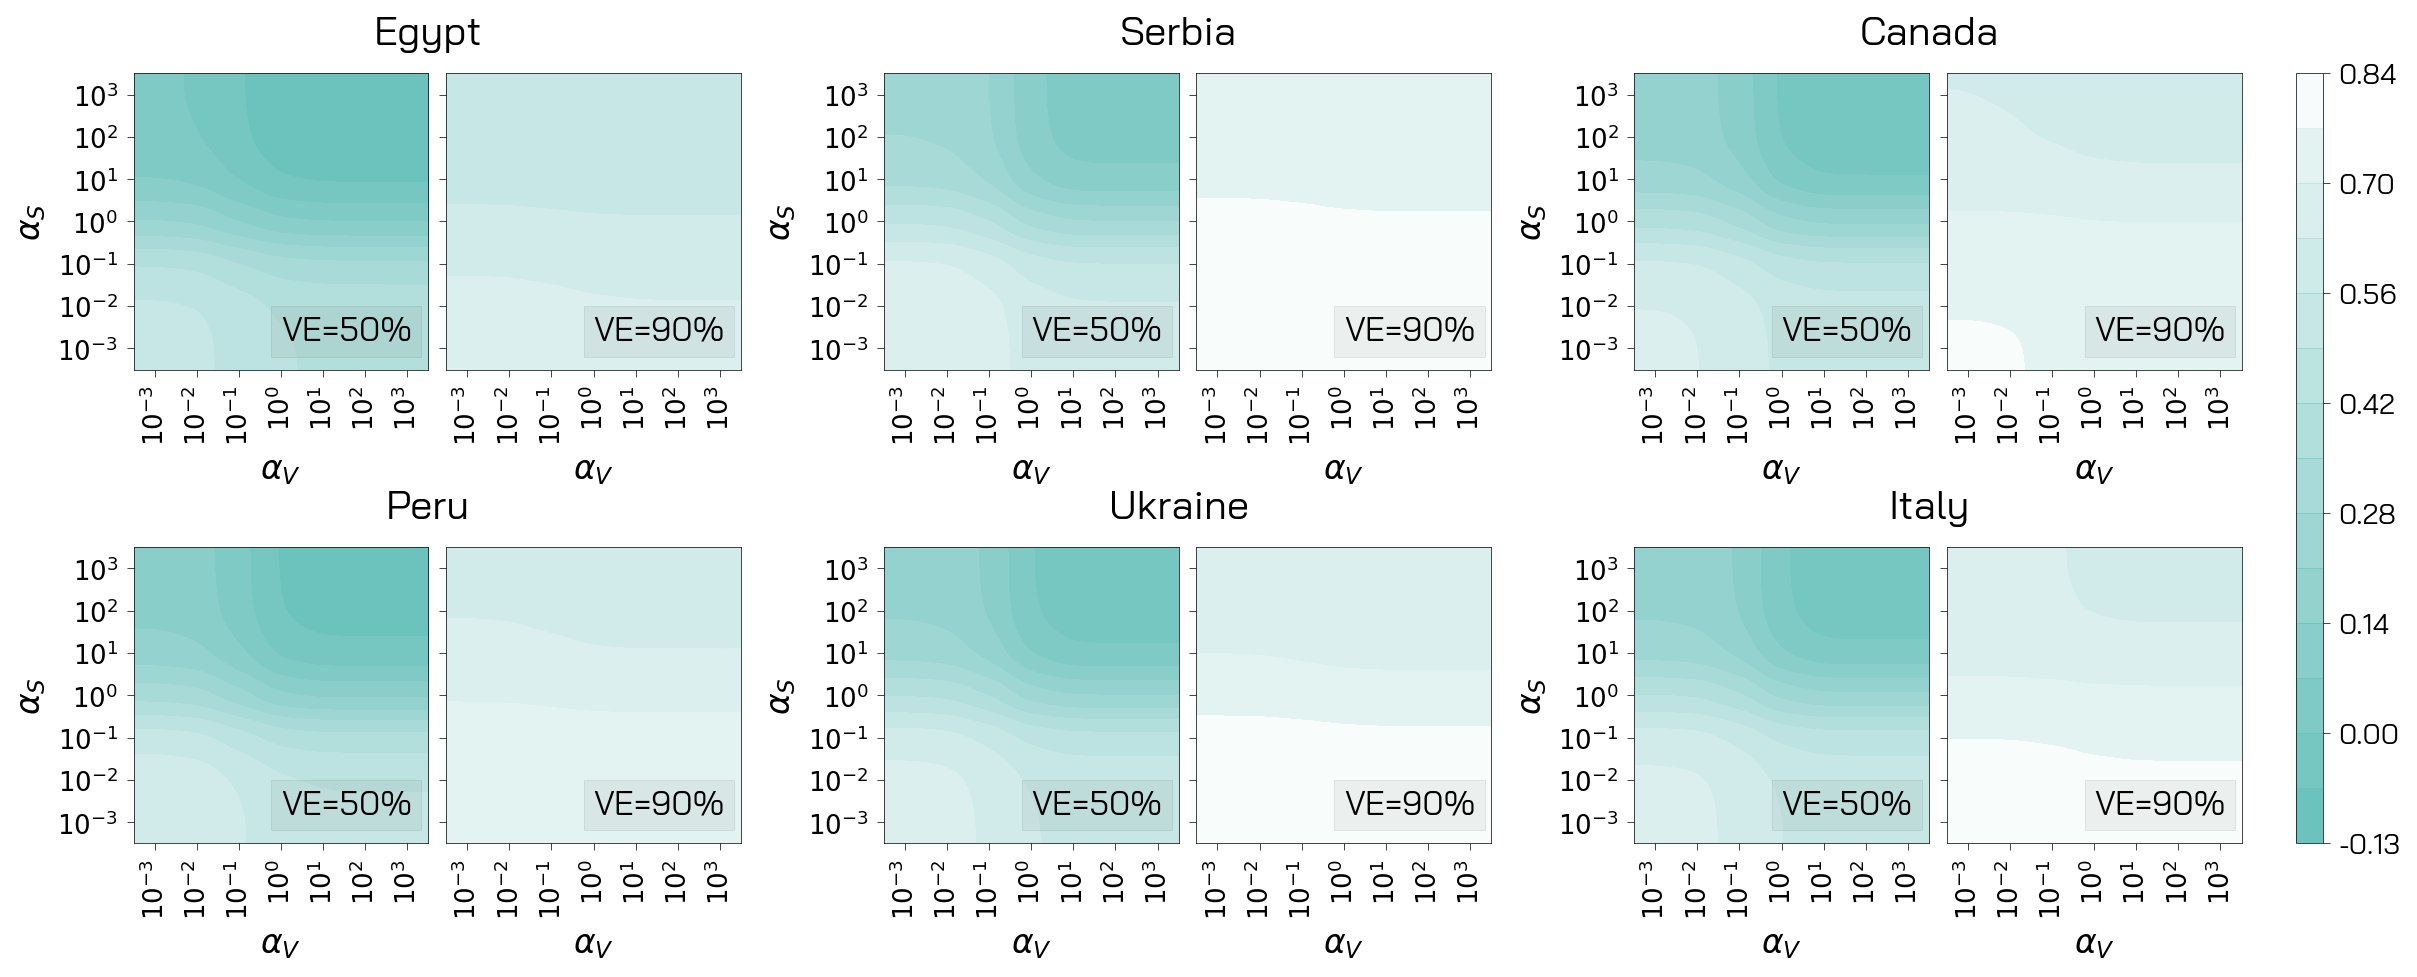

In [3]:
# import data
with open("../../output/phase_space_doublerate.pkl", "rb") as file: 
    data = pkl.load(file) 

nlevels = 15
c=0
cmap_colors = [to_rgba(colors[c], alpha=a) for a in np.linspace(0.05, 1, nlevels)]
cmap_colors.reverse()
cmap = ListedColormap(cmap_colors)

#Â create axes list
fig = plt.figure(figsize=(16., 6.), dpi=170)

num_rows, num_cols       = 2, 6
row_height, space_height = 3, 1
col_width,  space_width  = 5, 2

num_sep_rows = lambda x: int((x - 1) / 1)
num_sep_cols = lambda x: int((x - 1) / 2)

grid = (row_height * num_rows + space_height * num_sep_rows(num_rows), 
        col_width * num_cols + space_width * num_sep_cols(num_cols))
ax_list = []
for ind_row in range(num_rows):
    for ind_col in range(num_cols):
        grid_row = row_height * ind_row + space_height * num_sep_rows(ind_row + 1)
        grid_col = col_width * ind_col + space_width * num_sep_cols(ind_col + 1)
        ax_list += [plt.subplot2grid(grid, (grid_row, grid_col), rowspan=row_height, 
                                     colspan=col_width)]  
plt.subplots_adjust(hspace= 1, wspace=0.4)


# get vmin and vmax 
vmax, vmin   = 0, 100
for country in countries:
    for VE in [0.5, 0.9]:
        if data[country][VE].max() > vmax: 
            vmax = data[country][VE].max()
        if data[country][VE].min() < vmin:
            vmin = data[country][VE].min()
            
boundaries = np.linspace(vmin, vmax, nlevels)
norm       = BoundaryNorm(boundaries, cmap.N, clip=True)

i = 0
for country in countries:
    ax_list[i].set_title(country, y=1.05, x=1, fontsize=17)
    im = ax_list[i].imshow(data[country][0.5], origin="lower", cmap=cmap, interpolation=interpolation, aspect="auto", norm=norm)
    ax_list[i+1].imshow(data[country][0.9], origin="lower", cmap=cmap, interpolation=interpolation, aspect="auto", norm=norm)
    
    ax_list[i].set_xticks(range(len(alpha_2s)))
    ax_list[i].set_xticklabels(["$10^{-3}$","$10^{-2}$","$10^{-1}$","$10^{0}$","$10^{1}$","$10^{2}$","$10^{3}$"], rotation=90, fontsize=11)
    ax_list[i].set_yticks(range(len(alpha_1s)))
    ax_list[i].set_yticklabels(["$10^{-3}$","$10^{-2}$","$10^{-1}$","$10^{0}$","$10^{1}$","$10^{2}$","$10^{3}$"], fontsize=11)
    ax_list[i].set_ylabel("$\\alpha_S$", fontsize=14)
    ax_list[i].set_xlabel("$\\alpha_V$", fontsize=14)
    ax_list[i+1].set_xlabel("$\\alpha_V$", fontsize=14)
        
    ax_list[i+1].set_xticks(range(len(alpha_2s)))
    ax_list[i+1].set_xticklabels(["$10^{-3}$","$10^{-2}$","$10^{-1}$","$10^{0}$","$10^{1}$","$10^{2}$","$10^{3}$"], rotation=90, fontsize=11)
    ax_list[i+1].set_yticks(range(len(alpha_1s)))
    ax_list[i+1].set_yticklabels(["","","","","","",""], fontsize=12)
    
    ax_list[i].annotate("VE=50%", fontsize=14, bbox=props, xy=(0.5,0.1), xycoords='axes fraction')
    ax_list[i+1].annotate("VE=90%", fontsize=14, bbox=props, xy=(0.5,0.1), xycoords='axes fraction')
    
    i += 2
cbar_ax = fig.add_axes([0.92, 0.125, 0.01, 0.755])
cbar = plt.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig("./SM_img/phase_space_doublerate.pdf", bbox_inches="tight")